In [1]:
import numpy as np
import seaborn as sns
from numpy import random
import math

In [2]:
#lamda valor estatico gva_generacion de valores alearotrios
#  exponencial =gva
def exponencial(l):
    U=random.rand()
    return -1*(math.log(1-U)/l)

In [3]:
def aleatorio_entero():
    return random.randint(1,5)

In [4]:
#llegadas en segundos 
x=exponencial(0.00157)

In [5]:
print(x)

123.87245915445602


In [6]:
#valor kapa valor de personas que llegaran asl sistema
k=10

In [7]:
matriz=np.zeros((k,5))

In [8]:
matriz

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [9]:
#
t_llegada=0
t_en_sistema=0
for i in range(k):
    #t_usuario es tiempo entre usuaarios
    t_usuario=exponencial(0.00157);
    #llegada del cliente
    t_llegada=t_llegada+t_usuario
    #tiempo de espera
    #t_espera=
    #inicio del servicio de cagero
    t_inicio_sercic=t_llegada+aleatorio_entero()
    #tiempo de atencion aleatorio es el tiempo deatencio aleatorio_entero()
    #poison es estocastico entre 1 y 5
    t_servicio=t_inicio_sercic+random.poisson(5)
    #tiempo de finalizacion
    t_en_sistema=t_en_sistema+(t_servicio-t_inicio_sercic)

    matriz[i,0]=t_usuario
    matriz[i,1]=t_llegada
    matriz[i,2]=t_inicio_sercic
    matriz[i,3]=t_servicio
    matriz[i,4]=t_en_sistema
    print("TEU %s,TLL %s, TIS %s, TSS %s, TENS %s" %(t_usuario, t_llegada,t_inicio_sercic,t_servicio, t_en_sistema))

TEU 2163.0394953094997,TLL 2163.0394953094997, TIS 2164.0394953094997, TSS 2167.0394953094997, TENS 3.0
TEU 1014.6624761128635,TLL 3177.7019714223634, TIS 3180.7019714223634, TSS 3184.7019714223634, TENS 7.0
TEU 406.6670554765421,TLL 3584.3690268989053, TIS 3588.3690268989053, TSS 3592.3690268989053, TENS 11.0
TEU 366.68412883287266,TLL 3951.053155731778, TIS 3952.053155731778, TSS 3959.053155731778, TENS 18.0
TEU 455.2792187161627,TLL 4406.332374447941, TIS 4410.332374447941, TSS 4416.332374447941, TENS 24.0
TEU 93.77562078338366,TLL 4500.107995231325, TIS 4501.107995231325, TSS 4506.107995231325, TENS 29.0
TEU 437.9139989561692,TLL 4938.021994187494, TIS 4941.021994187494, TSS 4942.021994187494, TENS 30.0
TEU 1063.5339560564496,TLL 6001.555950243944, TIS 6005.555950243944, TSS 6012.555950243944, TENS 37.0
TEU 217.5236493147663,TLL 6219.07959955871, TIS 6223.07959955871, TSS 6227.07959955871, TENS 41.0
TEU 1253.8730180285613,TLL 7472.952617587271, TIS 7475.952617587271, TSS 7483.95261

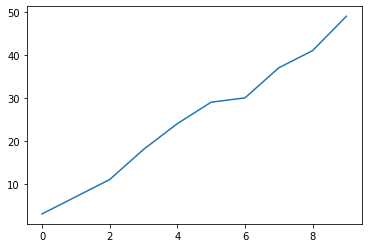

In [10]:
#graficar matriz[:,4] grafica solo el T_en_sistema
#grafica valor acumulado
sns.lineplot(x=range(10),y=matriz[:,4])

In [11]:
matriz[:,4].sum()

249.0

In [12]:
#promedio
matriz[:,4].mean()

24.9

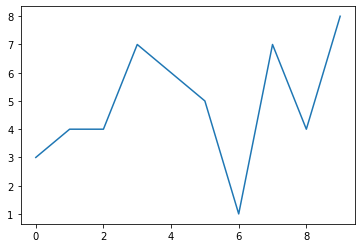

In [13]:
sns.lineplot(x=range(10),y=matriz[:,3]-matriz[:,2])

In [14]:
#grafica caja de vigotes
T=matriz[:,3]-matriz[:,2]

In [15]:
T

array([3., 4., 4., 7., 6., 5., 1., 7., 4., 8.])

In [16]:
T.max()


8.0

In [17]:
T.min()

1.0

In [18]:
def freq_abs(x):
    _min=x.min()
    _max=x.max()
    m=np.zeros((int(_max)+1,4))
    for i in range(int(_min),int(_max)+1):
        c=0
        for j in range(k):
            if i==x[j]:
                c=c+1
        m[i,0]=i
        m[i,1]=c
        #print("%s--->%s"%(i,c))
    return m

In [19]:
T=freq_abs(T)

In [20]:
T

array([[0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [2., 0., 0., 0.],
       [3., 1., 0., 0.],
       [4., 3., 0., 0.],
       [5., 1., 0., 0.],
       [6., 1., 0., 0.],
       [7., 2., 0., 0.],
       [8., 1., 0., 0.]])

In [21]:
def freq_rel(x):
    total= x[:,1].sum()
    _max= x[:,0].max()
    fr=0
    for i in range(int(_max)):
        fr=fr+x[i,1]
        x[i,2]=fr
        x[i,3]=x[i,2]/total
    return x

In [22]:
freq_rel(T)

array([[0. , 0. , 0. , 0. ],
       [1. , 1. , 1. , 0.1],
       [2. , 0. , 1. , 0.1],
       [3. , 1. , 2. , 0.2],
       [4. , 3. , 5. , 0.5],
       [5. , 1. , 6. , 0.6],
       [6. , 1. , 7. , 0.7],
       [7. , 2. , 9. , 0.9],
       [8. , 1. , 0. , 0. ]])

In [24]:
sns.boxplot(data=T[:,1])